<Figure size 640x480 with 0 Axes>

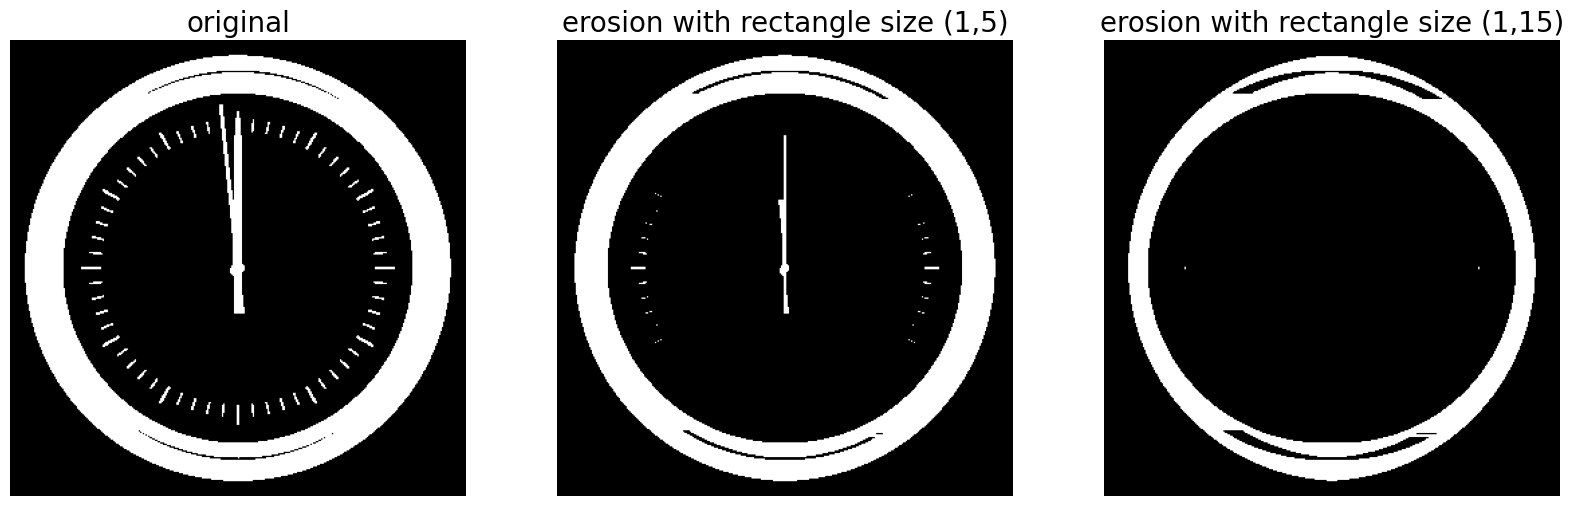

In [1]:
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as pylab
from skimage.morphology import binary_erosion, rectangle
def plot_image(image, title=''):
    pylab.title(title, size=20), pylab.imshow(image)
    pylab.axis('off') 
im = rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/clock2.jpg'))
im[im <= 0.5] = 0 # create binary image with fixed threshold 0.5
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(20,10))
pylab.subplot(1,3,1), plot_image(im, 'original')
im1 = binary_erosion(im, rectangle(1,5))
pylab.subplot(1,3,2), plot_image(im1, 'erosion with rectangle size (1,5)')
im1 = binary_erosion(im, rectangle(1,15))
pylab.subplot(1,3,3), plot_image(im1, 'erosion with rectangle size (1,15)')
pylab.show()

<Figure size 640x480 with 0 Axes>

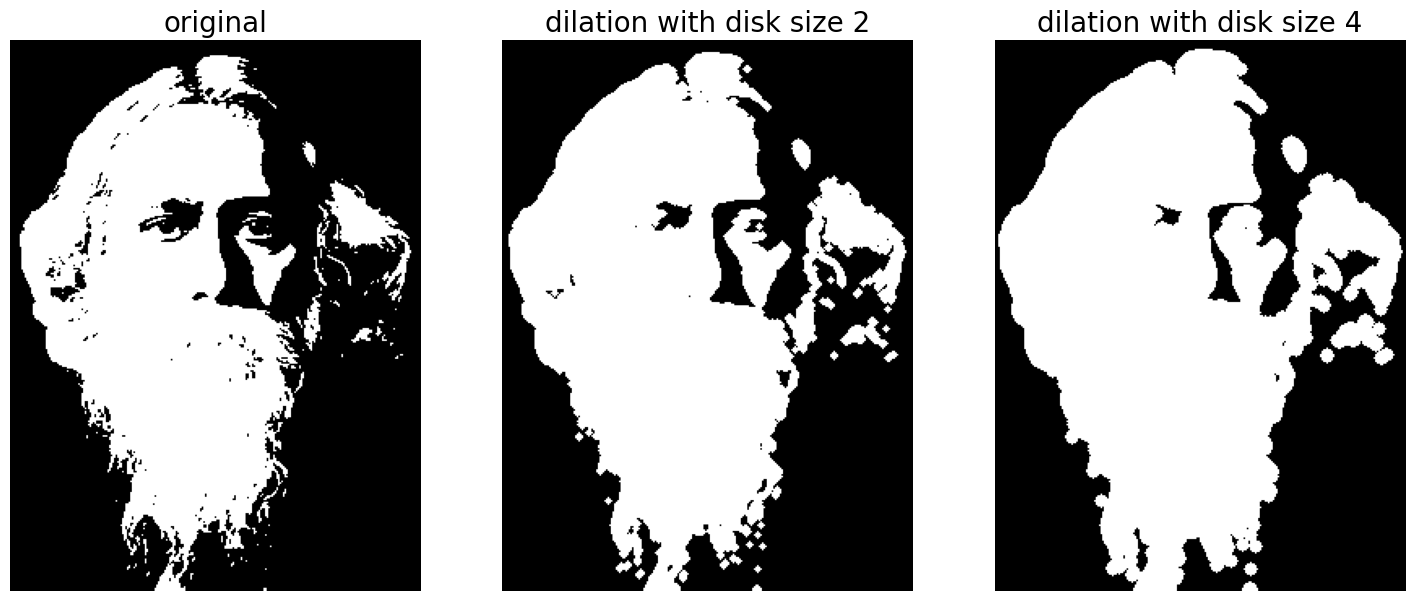

In [2]:
from skimage.morphology import binary_dilation, disk
from skimage import img_as_float
im = img_as_float(imread('D:/ĐH/Xử lý ảnh/BTL/images/tagore.png'))
im = 1 - im[...,3]
im[im <= 0.5] = 0
im[im > 0.5] = 1
pylab.gray()
pylab.figure(figsize=(18,9))
pylab.subplot(131)
pylab.imshow(im)
pylab.title('original', size=20)
pylab.axis('off')
for d in range(1,3):
    pylab.subplot(1,3,d+1)
    im1 = binary_dilation(im, disk(2*d))
    pylab.imshow(im1)
    pylab.title('dilation with disk size ' + str(2*d), size=20)
    pylab.axis('off')
pylab.show()

<Figure size 640x480 with 0 Axes>

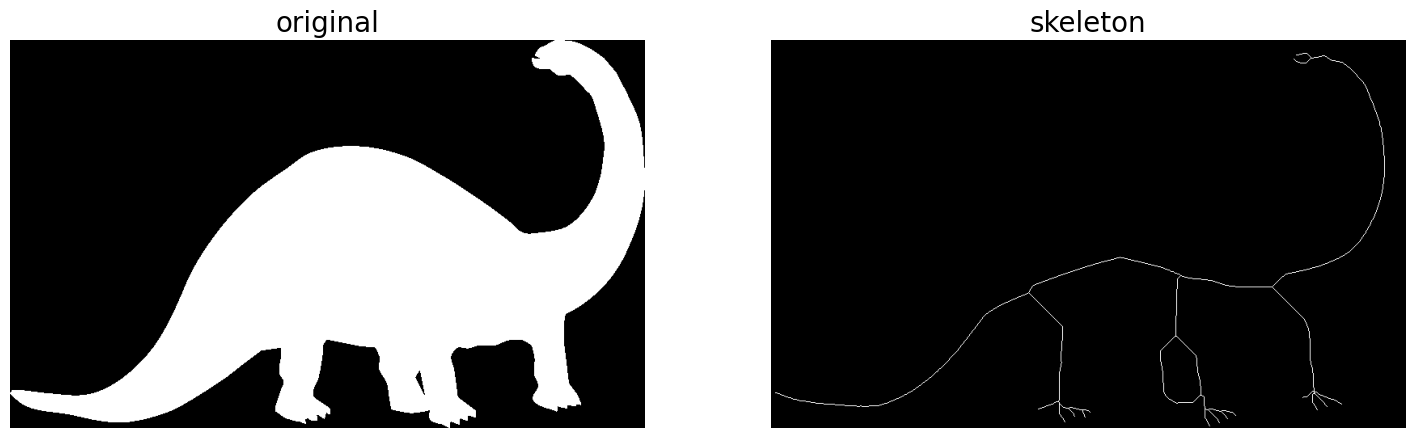

In [3]:
def plot_images_horizontally(original, filtered, filter_name, sz=(18,7)):
    pylab.gray()
    pylab.figure(figsize = sz)
    pylab.subplot(1,2,1), plot_image(original, 'original')
    pylab.subplot(1,2,2), plot_image(filtered, filter_name)
    pylab.show()
from skimage.morphology import skeletonize
im = img_as_float(imread('D:/ĐH/Xử lý ảnh/BTL/images/dynasaur.png')[...,3])
threshold = 0.5
im[im <= threshold] = 0
im[im > threshold] = 1
skeleton = skeletonize(im)
plot_images_horizontally(im, skeleton, 'skeleton',sz=(18,9))

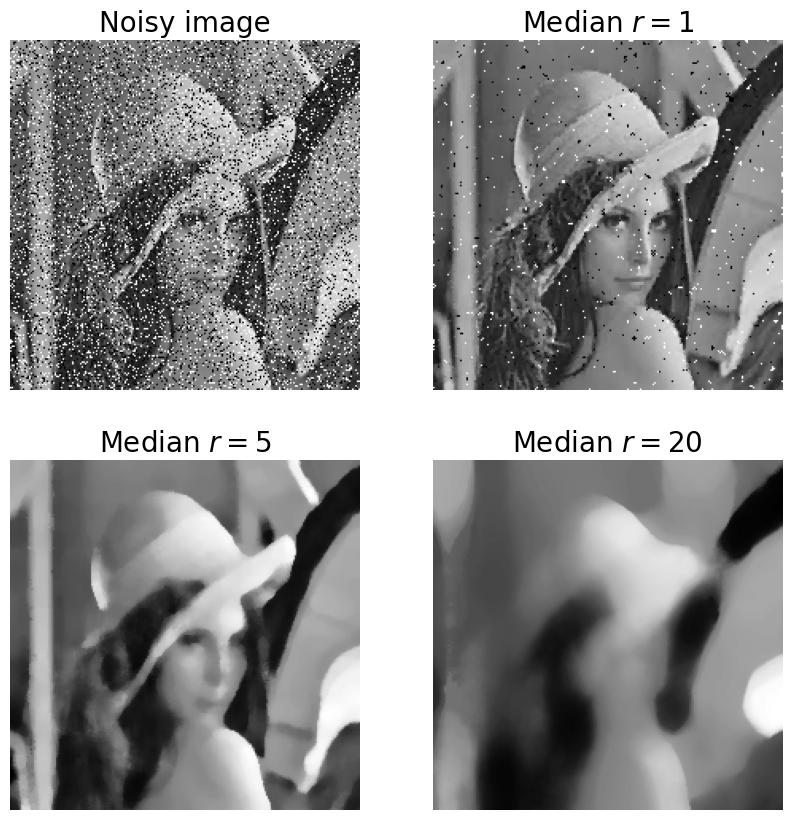

In [7]:
from skimage.filters.rank import median
from skimage.morphology import disk
import numpy as np
def plot_gray_image(ax, image, title):
    ax.imshow(image, cmap='gray')
    ax.set_title(title, size=20)
    ax.axis('off')
noisy_image = (rgb2gray(imread('D:/ĐH/Xử lý ảnh/BTL/images/lena.jpg'))*255).astype(np.uint8)
noise = np.random.random(noisy_image.shape)
noisy_image[noise > 0.9] = 255
noisy_image[noise < 0.1] = 0
fig, axes = pylab.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
axes1, axes2, axes3, axes4 = axes.ravel()
plot_gray_image(axes1, noisy_image, 'Noisy image')
plot_gray_image(axes2, median(noisy_image, disk(1)), 'Median $r=1$')
plot_gray_image(axes3, median(noisy_image, disk(5)), 'Median $r=5$')
plot_gray_image(axes4, median(noisy_image, disk(20)), 'Median $r=20$')